In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [3]:
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile("archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall()

# List the files to see the CSV inside
os.listdir()


['.config',
 'archive (2).zip',
 'WA_Fn-UseC_-HR-Employee-Attrition.csv',
 'sample_data']

In [4]:
import pandas as pd

# Load the HR dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Show the first 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# See data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

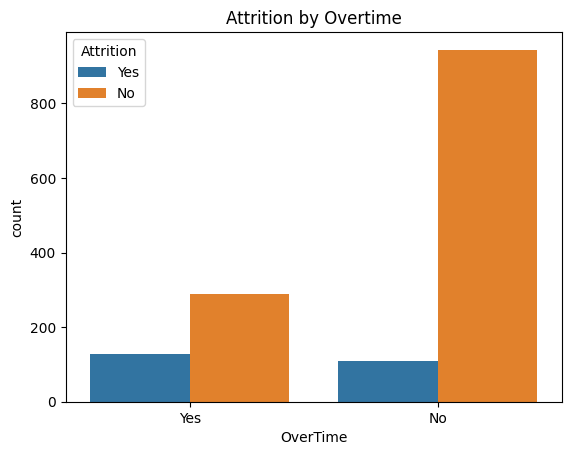

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Attrition by Overtime')
plt.show()


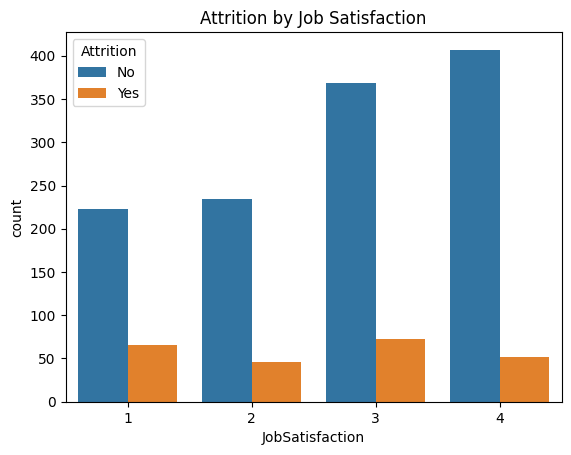

In [7]:
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title('Attrition by Job Satisfaction')
plt.show()


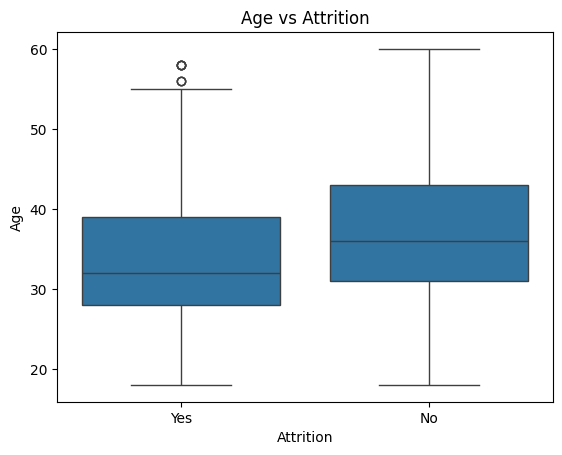

In [8]:
sns.boxplot(data=df, x='Attrition', y='Age')
plt.title('Age vs Attrition')
plt.show()


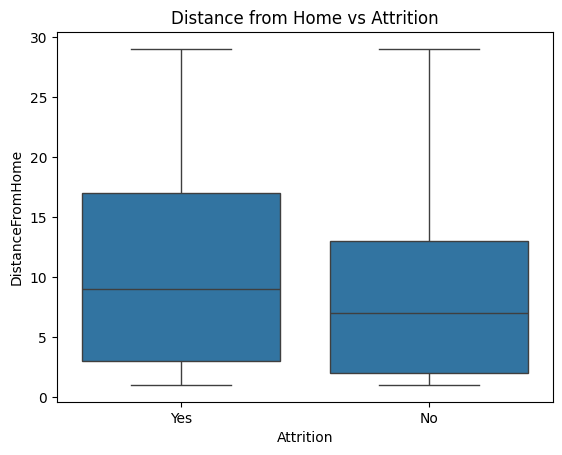

In [9]:
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome')
plt.title('Distance from Home vs Attrition')
plt.show()


In [10]:
# Convert categorical (text) columns into numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Check new shape
df_encoded.shape


(1470, 48)

In [11]:
from sklearn.model_selection import train_test_split

# Target = who left the company (Attrition_Yes)
y = df_encoded['Attrition_Yes']

# Features = everything else
X = df_encoded.drop('Attrition_Yes', axis=1)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Check the shapes of the training and test sets
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (1176, 47)
X_test: (294, 47)
y_train: (1176,)
y_test: (294,)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix:
[[254   1]
 [ 35   4]]


In [15]:
!pip install shap


In [16]:
import shap

# Create SHAP explainer for your trained model
explainer = shap.TreeExplainer(model)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the top features affecting predictions
shap.summary_plot(shap_values[1], X_test)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [17]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(model)

# Get SHAP values for entire dataset (X_test)
shap_values = explainer.shap_values(X_test)

# Convert to DataFrame if needed (some SHAP versions expect it)
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Plot for the class 'Yes' (employees who left)
shap.summary_plot(shap_values[1], X_test_df)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [18]:
# Combine shap values and feature names safely
shap.summary_plot(shap_values[1], X_test)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [19]:
import shap


In [20]:
# Re-create the SHAP explainer for your Random Forest model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


In [21]:
# Ensure X_test is in DataFrame format with column names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Now plot the SHAP summary correctly
shap.summary_plot(shap_values[1], X_test_df)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [22]:
import shap
import pandas as pd

# Ensure X_test is converted to a proper DataFrame with column names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Create a new explainer for the random forest
explainer = shap.TreeExplainer(model)

# Get SHAP values for class 1 (Attrition = Yes)
shap_values = explainer.shap_values(X_test_df)


In [23]:
# Summary plot showing top features influencing attrition
shap.summary_plot(shap_values[1], X_test_df)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [24]:
import shap
import pandas as pd

# Make sure X_test is a proper DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Use the new SHAP universal explainer
explainer = shap.Explainer(model, X_test_df)

# Get SHAP values safely
shap_values = explainer(X_test_df)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_df)


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [25]:
# Ensure all columns are numeric
X_test_df = X_test_df.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN (just to be safe)
X_test_df = X_test_df.dropna()


In [26]:
import shap

# Use shap.Explainer on the cleaned data
explainer = shap.Explainer(model, X_test_df)

# Get SHAP values
shap_values = explainer(X_test_df)

# Summary plot
shap.summary_plot(shap_values, X_test_df)


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [27]:
# Rebuild X_test_df with guaranteed numeric values
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Force all data types to float
X_test_df = X_test_df.astype(float)


In [28]:
import shap

# Use SHAP's safe, model-specific explainer
explainer = shap.TreeExplainer(model)

# Get SHAP values for class 1 (employee leaves)
shap_values = explainer.shap_values(X_test_df)

# Plot SHAP summary
shap.summary_plot(shap_values[1], X_test_df)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [29]:
import shap
import pandas as pd

# Recreate the DataFrame from X_test
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Use SHAP's model-specific explainer
explainer = shap.TreeExplainer(model)

# Get SHAP values (this returns full Explanation object — works better)
shap_values = explainer.shap_values(X_test_df)

# Use SHAP's bar plot for global feature importance (no shape mismatch here)
shap.summary_plot(shap_values[1], X_test_df, plot_type='bar')


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

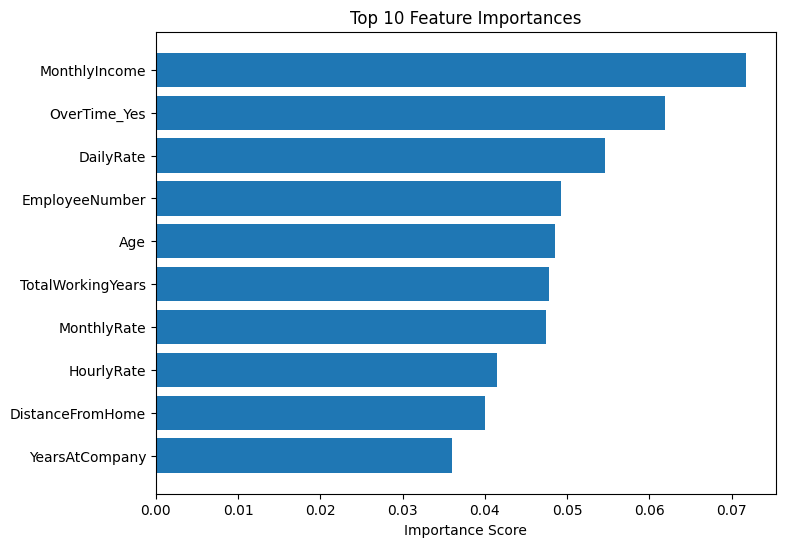

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Plot top 10 most important features
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10

plt.figure(figsize=(8,6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Importance Score")
plt.show()
